# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** YYYY/YYYY

### Team Members (Alphabetical Order):
1. Surname1, Name1 (StudentID1);
2. Surname2, Name2 (StudentID2).

Now, fill the python list below with the Student IDs of the team

In [16]:
StudentIDs = [361352, 360247]  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [17]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Branded clothing
Entertainment spending
Spending on looks
Spending on healthy eating
Smoking
Healthy eating
Psychology
Mathematics
Physics
PC
Biology
Chemistry
Reading
Law
Art exhibitions
Dancing
Musical instruments
Writing
Active sport
Gardening
Celebrities
Theatre
Fun with friends
Pets
Movies
Thriller
Comedy
Sci-fi
War
Fantasy/Fairy tales
Documentary
Action
Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Pop
Rock
Metal or Hardrock
Reggae, Ska
Swing, Jazz
Rock n roll
Alternative
Latino
Techno, Trance
Daily events
Workaholism
Thinking ahead
Final judgement
Loss of interest
Friends versus money
Funniness
Criminal damage
Decision making
Elections
Judgment calls
Eating to survive
Giving
Loneliness
Cheating in school
Health
God
Dreams
Charity
Number of friends
Punctuality
Lying
Waiting
Appearence and gestures
Socializing
Achievements
Children
Getting angry
Public speaking
Unpopularity
Life struggles


,Finances,Branded clothing,Entertainment spending,Spending on looks,Spending on healthy eating,Smoking,Healthy eating,Psychology,Mathematics,Physics,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
235,2,4,4,5,4,never smoked,3,2,2,1,...,17,160,60,1,female,right,primary school,no,city,block of flats
42,3,3,3,1,1,tried smoking,3,3,1,1,...,18,164,51,4,female,right,secondary school,no,city,block of flats
515,4,2,4,4,3,current smoker,3,3,3,3,...,25,167,49,1,female,right,college/bachelor degree,yes,city,house/bungalow
597,4,4,5,5,5,tried smoking,5,4,1,1,...,18,170,54,1,female,right,secondary school,no,city,block of flats
375,1,5,5,5,5,current smoker,1,5,3,2,...,17,175,60,2,male,right,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,3,5,4,3,1,former smoker,1,2,2,3,...,16,170,54,2,female,right,college/bachelor degree,no,city,house/bungalow
273,4,5,5,5,4,tried smoking,3,4,2,2,...,25,167,64,2,female,right,masters degree,no,city,block of flats
90,5,1,4,4,3,tried smoking,3,4,4,2,...,16,161,54,1,female,right,secondary school,no,village,house/bungalow
197,4,1,3,3,4,current smoker,3,5,1,1,...,22,170,60,0,female,right,secondary school,yes,city,house/bungalow



*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


,Finances,Branded clothing,Entertainment spending,Spending on looks,Spending on healthy eating,Smoking,Healthy eating,Psychology,Mathematics,Physics,...,Questionnaires or polls,Internet usage,Flying,Darkness,Heights,Spiders,Snakes,Ageing,Dangerous dogs,Fear of public speaking
235,2,4,4,5,4,never smoked,3,2,2,1,...,3,few hours a day,3,2,2,2,3,4,4,3
42,3,3,3,1,1,tried smoking,3,3,1,1,...,4,less than an hour a day,3,1,1,5,1,1,3,5
515,4,2,4,4,3,current smoker,3,3,3,3,...,3,few hours a day,4,3,4,3,3,3,3,3
597,4,4,5,5,5,tried smoking,5,4,1,1,...,4,few hours a day,1,3,4,4,1,2,1,3
375,1,5,5,5,5,current smoker,1,5,3,2,...,5,few hours a day,1,3,1,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,3,5,4,3,1,former smoker,1,2,2,3,...,1,less than an hour a day,1,3,4,5,4,2,1,2
273,4,5,5,5,4,tried smoking,3,4,2,2,...,3,few hours a day,1,2,2,1,2,3,2,3
90,5,1,4,4,3,tried smoking,3,4,4,2,...,5,few hours a day,4,1,2,2,4,1,2,3
197,4,1,3,3,4,current smoker,3,5,1,1,...,3,few hours a day,1,5,5,4,4,5,5,2



*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
235,17,160,60,1,female,right,primary school,no,city,block of flats
42,18,164,51,4,female,right,secondary school,no,city,block of flats
515,25,167,49,1,female,right,college/bachelor degree,yes,city,house/bungalow
597,18,170,54,1,female,right,secondary school,no,city,block of flats
375,17,175,60,2,male,right,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...
522,16,170,54,2,female,right,college/bachelor degree,no,city,house/bungalow
273,25,167,64,2,female,right,masters degree,no,city,block of flats
90,16,161,54,1,female,right,secondary school,no,village,house/bungalow
197,22,170,60,0,female,right,secondary school,yes,city,house/bungalow


In [18]:
#RECAP SU TUTTI I DATASET

#responses_hw: È il file CSV originale completo (674 persone, 150 domande)
#responses: È il dataset personale. Contiene solo le persone e le domande selezionate casualmente per il tuo gruppo (circa 3/4 delle righe e 2/3 delle colonne)

#ora il nostro dataset responses viene diviso in 2

#responses_ft (Features): Contiene solo le domande su gusti, opinioni e hobby. È il dataset che trasformerai continuamente.
#responses_lb (Labels): Contiene solo i dati demografici (Età, Genere, etc.). Questo dataset non si tocca fino all'Esercizio 5 per controllare se i tuoi cluster hanno senso

#ES 1
#responses_ft_enc -> (Encoded) Le risposte testuali (es. "Never smoked") sono diventate numeri (es. 0)
#responses_ft_pp (Preprocessed): Tutti i numeri sono stati "stirati" o "compressi" dallo scaler (Standard o MinMax)

#ES 2
#responses_ft_pca -> Invece di avere 100+ colonne, ne hai solo poche (massimo 5), chiamate PC1, PC2, etc.

## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [19]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
# import ...

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [20]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE StandardScaler


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
Per le variabili categoriche presenti nel dataset (come le abitudini al fumo o il livello di istruzione), abbiamo scelto di applicare l'Ordinal Encoding. Questa scelta è motivata dal fatto che, sebbene categoriche, queste risposte possiedono una natura intrinsecamente ordinata. Ad esempio, nella variabile 'Smoking habits', esiste una progressione logica da 'Never smoked' a 'Current smoker'. L'utilizzo di valori numerici ordinati permette di preservare questa gerarchia informativa, che risulterebbe invece dispersa con un encoding di tipo One-Hot, il quale aumenterebbe inutilmente la dimensionalità del dataset

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
Il preprocessing viene eseguito applicando lo scaler assegnato dal sistema your_scaler. L'operazione di scaling è un passaggio critico per la PCA, in quanto l'algoritmo identifica le direzioni di massima varianza. Senza normalizzazione, le variabili con range numerici più ampi (come 'Age' o 'Weight') dominerebbero le componenti principali rispetto alle valutazioni in scala 1-5, distorcendo l'analisi. Lo scaling garantisce che ogni caratteristica contribuisca equamente alla definizione dello spazio delle componenti principali

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [21]:
# Importiamo i moduli necessari per la codifica e la normalizzazione
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

# --- STEP 1: ENCODING DELLE VARIABILI CATEGORICHE ---

# Identifichiamo automaticamente le colonne che contengono dati testuali (tipo 'object').
# Nel dataset YPS, queste sono solitamente 11 colonne (es. Gender, Smoking, etc.).
categorical_cols = responses_ft.select_dtypes(include=['object']).columns
print(categorical_cols)

# Creiamo una copia del dataframe originale per evitare di sovrascrivere i dati grezzi.
responses_ft_enc = responses_ft.copy()

if len(categorical_cols) > 0:
    # Utilizziamo l'OrdinalEncoder perché le risposte categoriche del sondaggio
    # (es. frequenza o livelli) hanno un ordine logico sottostante[cite: 59, 60].
    # Questo trasforma i testi in numeri (0, 1, 2...) preservando tale gerarchia.
    encoder = OrdinalEncoder()
    responses_ft_enc[categorical_cols] = encoder.fit_transform(responses_ft[categorical_cols])

# --- STEP 2: PREPROCESSING (SCALING) ---

# Applichiamo lo scaler che è stato assegnato casualmente per il tuo gruppo nella cella 0.1.
# Lo scaling è fondamentale per la PCA, poiché l'algoritmo è sensibile alle diverse
# scale di grandezza delle variabili.
if your_scaler == 'StandardScaler':
    # Rende la media = 0 e la varianza = 1 per ogni feature.
    scaler = StandardScaler()
else:
    # Comprime i valori nell'intervallo [0, 1].
    scaler = MinMaxScaler()

# Eseguiamo il fit (calcolo parametri) e il transform (applicazione) sui dati codificati.
responses_ft_pp_values = scaler.fit_transform(responses_ft_enc)

# Ricostruiamo il DataFrame partendo dall'array NumPy ottenuto.
# È essenziale mantenere i nomi delle colonne originali (le domande) e gli indici 
# delle persone per poter interpretare i risultati nei passi successivi.
responses_ft_pp = pd.DataFrame(
    responses_ft_pp_values, 
    columns=responses_ft_enc.columns, 
    index=responses_ft_enc.index
)

# Visualizziamo lo scaler utilizzato e le prime righe del dataset finale pronto per la PCA.
print(f"Tecnica di scaling applicata: {your_scaler}")
display(responses_ft_pp.head())

Index(['Smoking', 'Punctuality', 'Lying', 'Internet usage'], dtype='object')
Tecnica di scaling applicata: StandardScaler


,Finances,Branded clothing,Entertainment spending,Spending on looks,Spending on healthy eating,Smoking,Healthy eating,Psychology,Mathematics,Physics,...,Questionnaires or polls,Internet usage,Flying,Darkness,Heights,Spiders,Snakes,Ageing,Dangerous dogs,Fear of public speaking
235,-0.888509,0.748055,0.707029,1.532901,0.450270,0.073667,0.006424,-0.892418,-0.303583,-0.875527,...,0.203739,-0.542804,0.819524,-0.218243,-0.451511,-0.598317,-0.056283,1.077014,0.681763,0.144724
42,-0.020583,-0.012017,-0.138731,-1.760721,-2.351002,0.940542,0.006424,-0.091774,-1.038572,-0.875527,...,1.140936,0.949906,0.819524,-1.030234,-1.244789,1.342377,-1.412432,-1.114551,-0.038429,1.809044
515,0.847343,-0.772089,0.707029,0.709496,-0.483487,-1.660082,0.006424,-0.091774,0.431407,0.762243,...,0.203739,-0.542804,1.653889,0.593748,1.135047,0.048581,-0.056283,0.346492,-0.038429,0.144724
597,0.847343,0.748055,1.552789,1.532901,1.384028,0.940542,2.173507,0.708871,-1.038572,-0.875527,...,1.140936,-0.542804,-0.849205,0.593748,1.135047,0.695479,-1.412432,-0.384029,-1.478814,0.144724
375,-1.756435,1.508126,1.552789,1.532901,1.384028,-1.660082,-2.160659,1.509516,0.431407,-0.056642,...,2.078134,-0.542804,-0.849205,0.593748,-1.244789,-1.245215,-0.056283,-1.114551,-1.478814,-1.519597


In [22]:
from matplotlib.patches import Patch
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# 1. Prendiamo le categorie dal tuo dizionario iniziale
yps_categories = list(features_by_type.keys()) 

# 2. Usiamo la mappa colori 'Set3' 
# Creiamo un colore diverso per ognuna delle tue categorie (Music, Movies, etc.)
set3_colors = plt.get_cmap('Set3').colors
yps_color_dict = {cat: set3_colors[i % len(set3_colors)] for i, cat in enumerate(yps_categories)}

# 3. Creiamo gli elementi per la LEGENDA (i quadratini colorati)
yps_legend_elements = [Patch(facecolor=yps_color_dict[cat], edgecolor='black', label=cat) 
                       for cat in yps_categories]

# 4. Creiamo la lista definitiva dei colori per le tue 150 feature
# Serve per dire a plt.bar: "la barra 1 è gialla, la barra 2 è blu..."
feature_colors = []
for col in responses_ft_pp.columns:
    found = False
    for cat, f_list in features_by_type.items():
        if col in f_list:
            feature_colors.append(yps_color_dict[cat])
            found = True
            break
    if not found: feature_colors.append('grey') # Colore di backup

#### Comment the results obtained after the preprocessing operation (max 100 words):
Dopo il preprocessing, tutte le feature presentano ora una scala comparabile. Se è stato usato StandardScaler, i dati hanno media nulla e varianza unitaria; se MinMaxScaler, sono compressi nel range [0, 1]. Questo bilanciamento permette alla PCA di operare correttamente sulla struttura di correlazione dei dati anziché sulle mere ampiezze numeriche, facilitando l'estrazione di componenti principali che riflettano realmente i profili psicologici e comportamentali degli intervistati

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

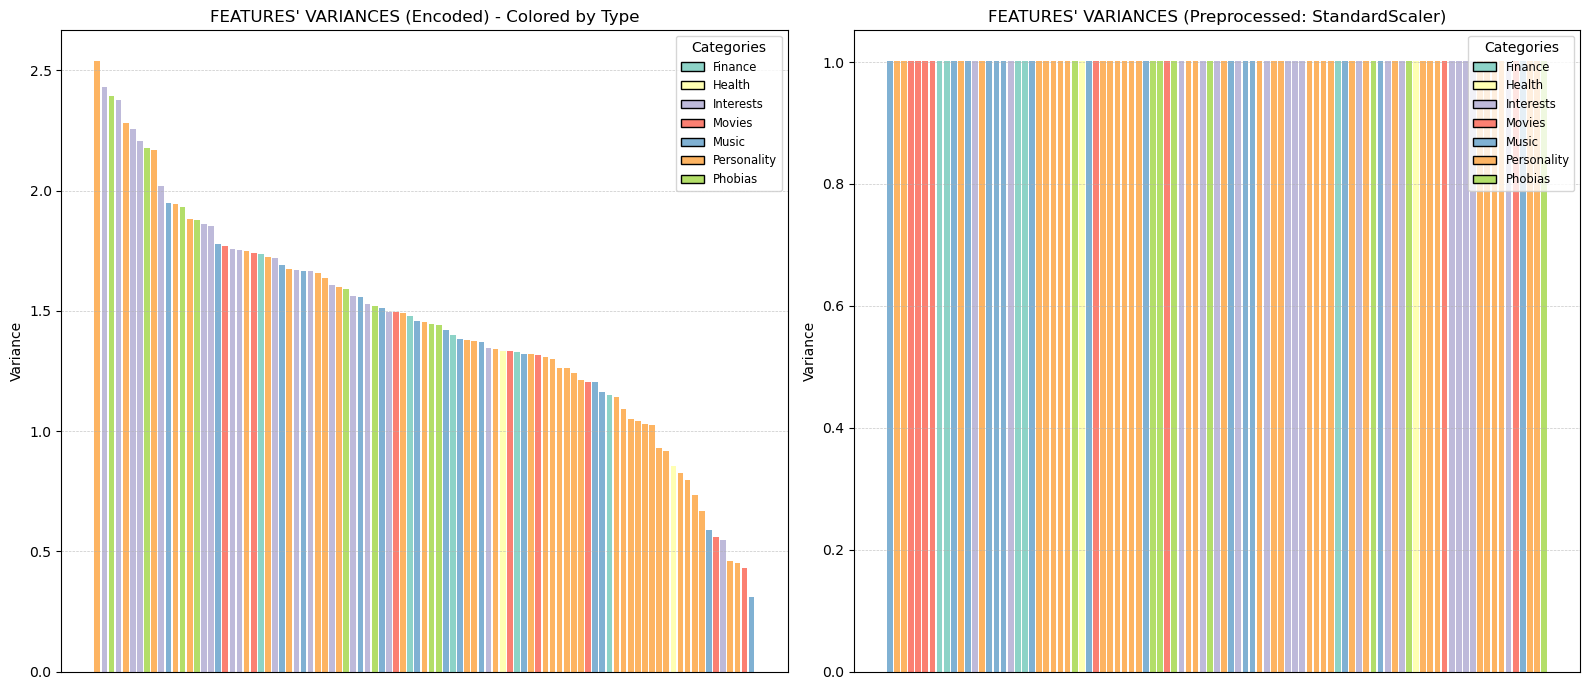

In [23]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.cm as cm

# --- 2.1: ANALISI DELLA VARIANZA DELLE FEATURE ---

# Calcoliamo la varianza per ogni feature nei due dataset
# 'responses_ft_enc' contiene i dati codificati ma non scalati
# 'responses_ft_pp' contiene i dati dopo lo scaling (Standard o MinMax)
var_enc = responses_ft_enc.var()
var_pp = responses_ft_pp.var()

# ---  METODO PER I COLORI E LEGENDA ---

# 1. Prendiamo le categorie dal tuo dizionario iniziale
yps_categories = list(features_by_type.keys()) 

# 2. Usiamo la mappa colori 'Set3' 
# Creiamo un colore diverso per ognuna delle tue categorie (Music, Movies, etc.)
set3_colors = cm.Set3.colors
yps_color_dict = {cat: set3_colors[i % len(set3_colors)] for i, cat in enumerate(yps_categories)}

# 3. Creiamo gli elementi per la LEGENDA (i quadratini colorati)
yps_legend_elements = [Patch(facecolor=yps_color_dict[cat], edgecolor='black', label=cat) 
                       for cat in yps_categories]

# 4. Creiamo la lista definitiva dei colori per le feature
feature_colors_list = []
for col in responses_ft_enc.columns:
    found = False
    for cat, f_list in features_by_type.items():
        if col in f_list:
            feature_colors_list.append(yps_color_dict[cat])
            found = True
            break
    if not found: feature_colors_list.append('grey') 

# --- CREAZIONE DEL GRAFICO ---

# Creazione del grafico per confrontare le varianze (Stile Fifa Cell 12)
plt.figure(figsize=(16, 7))

# Subplot 1: Varianza dei dati codificati (ordinati per valore per leggibilità)
plt.subplot(1, 2, 1)
sorted_idx_enc = var_enc.sort_values(ascending=False).index
plt.bar(np.arange(len(var_enc)), var_enc[sorted_idx_enc], 
        color=[feature_colors_list[responses_ft_enc.columns.get_loc(c)] for c in sorted_idx_enc])
plt.title('FEATURES\' VARIANCES (Encoded) - Colored by Type')
plt.ylabel('Variance')
plt.xticks([]) 
plt.legend(handles=yps_legend_elements, title="Categories", loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Subplot 2: Varianza dei dati pre-processati
plt.subplot(1, 2, 2)
sorted_idx_pp = var_pp.sort_values(ascending=False).index
plt.bar(np.arange(len(var_pp)), var_pp[sorted_idx_pp], 
        color=[feature_colors_list[responses_ft_pp.columns.get_loc(c)] for c in sorted_idx_pp])
plt.title(f'FEATURES\' VARIANCES (Preprocessed: {your_scaler})')
plt.ylabel('Variance')
plt.xticks([]) 
plt.legend(handles=yps_legend_elements, title="Categories", loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

#### Comment the results obtained for the variances (max 150 words):
L'analisi dei grafici evidenzia l'impatto fondamentale del preprocessing. Nel dataset codificato responses_ft_enc, le varianze sono disomogenee: variabili con range numerici più ampi o distribuzioni più sparse mostrano valori di varianza molto più elevati, rischiando di dominare l'analisi successiva. Al contrario, nel dataset pre-processato responses_ft_pp, le varianze risultano normalizzate. Se è stato utilizzato lo StandardScaler, tutte le feature presentano ora una varianza unitaria (1.0), rendendole equamente pesate. Se è stato usato il MinMaxScaler, le varianze sono comunque compresse in un range comparabile. Questo livellamento è essenziale per la PCA, poiché garantisce che la cattura della varianza massima non sia guidata dalla scala numerica delle domande, ma dalle reali relazioni di correlazione tra le risposte degli utenti.

Dubbio Poz -> alla PCA non interessano le singole varianze delle feature, ma le covarianze fra esse quindi se sale una sale anche l' altra .... la PCA migliore sara quella in cui si riescono a rappresentare piu feature, quindi quella in cui piu feature sono correlate e salgono insieme 
es: tutti quelli che danno voto x alla musica danno lo stesso voto x anche a sport, tv .....

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

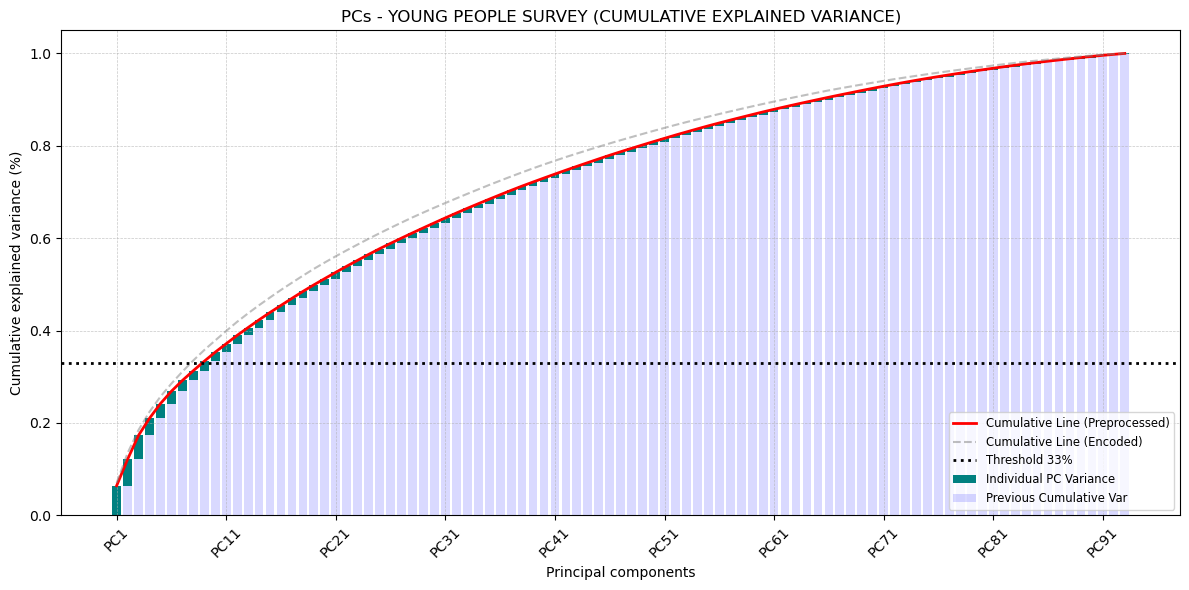

Numero di PC per raggiungere il 33% di varianza (m'): 9


In [24]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Inizializziamo la PCA per calcolare tutte le n componenti (pari al numero di feature)
# RICORDA : Con la fit, la PCA analizza le correlazioni tra le 150 variabili per calcolare i pesi (loadings) 
# e identificare le direzioni di massima varianza, ovvero i "concetti" che riassumono il dataset (PCA).
pca_pp = PCA().fit(responses_ft_pp)
pca_enc = PCA().fit(responses_ft_enc) 

# Calcoliamo la varianza spiegata cumulata
# Varianza Cumulata PCn = Somma di tutte le varianze fino alla componente n,
# viene utilizzata per decidere dove "tagliare" il numero di dimensioni (m), necessario per coprire il 33% della varianza totale.
cum_var_pp = np.cumsum(pca_pp.explained_variance_ratio_)
cum_var_enc = np.cumsum(pca_enc.explained_variance_ratio_)

n_features = pca_pp.n_features_in_

plt.figure(figsize=(12, 6))

# BARPLOT CON EFFETTO ACCUMULATO 
# La barra solida è la varianza della singola PC, appoggiata sulla cumulata precedente
bottom_val = np.insert(cum_var_pp, 0, 0)[:-1]
plt.bar(np.arange(n_features), pca_pp.explained_variance_ratio_, bottom=bottom_val, 
        color='teal', label='Individual PC Variance')

# La barra semitrasparente mostra il "riempimento" cumulativo precedente
plt.bar(np.arange(n_features), bottom_val, color='b', alpha=0.15, label='Previous Cumulative Var')

# LA PARTE IMPORTANTE: La linea rossa della varianza cumulata
plt.plot(cum_var_pp, 'r', linewidth=2, label='Cumulative Line (Preprocessed)')
plt.plot(cum_var_enc, 'gray', linestyle='--', alpha=0.5, label='Cumulative Line (Encoded)')

# Linea di riferimento al 33% 
plt.axhline(y=0.33, color='black', linestyle=':', linewidth=2, label='Threshold 33%')

plt.title('PCs - YOUNG PEOPLE SURVEY (CUMULATIVE EXPLAINED VARIANCE)')
# Usiamo uno step di 10 per le label perché 150 PC sono troppe da visualizzare singolarmente
plt.xticks(ticks=np.arange(0, n_features, 10), rotation=45, 
           labels=[f'PC{i}' for i in range(1, n_features + 1, 10)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()

# Calcolo di m'
# cum_var_pp prende il primo indice del valore che rispecchia la condizione >= 0.33 (+1 perchè parte da 0)
# Es: [0.15, 0.28, 0.30, 0.42, ...] -> [False, False, False, True, ...] -> 4 componenti per raggiungere var = 33%
# cum_var_pp[3] = 0.42 = Var(PCA1) + Var(PCA2) + Var(PCA3) + Var(PCA4)  
m_prime = np.argmax(cum_var_pp >= 0.33) + 1
print(f"Numero di PC per raggiungere il 33% di varianza (m'): {m_prime}")

#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):

La curva della varianza spiegata cumulata mostra la capacità della PCA di sintetizzare l'informazione del dataset. Si osserva che nei dati non scalati la curva sale più rapidamente, poiché poche feature con alta varianza dominano le prime componenti. Nei dati pre-processati responses_ft_pp, la crescita è più graduale, riflettendo una distribuzione dell'informazione più democratica tra tutte le variabili. Notiamo che per spiegare il 33% della varianza totale è sufficiente un numero ridotto di componenti rispetto al numero totale di feature originarie. Questo conferma l'efficacia della PCA nel ridurre la dimensionalità, permettendo di passare da oltre un centinaio di domande a pochi concetti latenti senza una perdita eccessiva di segnale, obiettivo fondamentale per la successiva fase di profilazione dei clienti tramite clustering.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

Numero di componenti scelte (m): 5


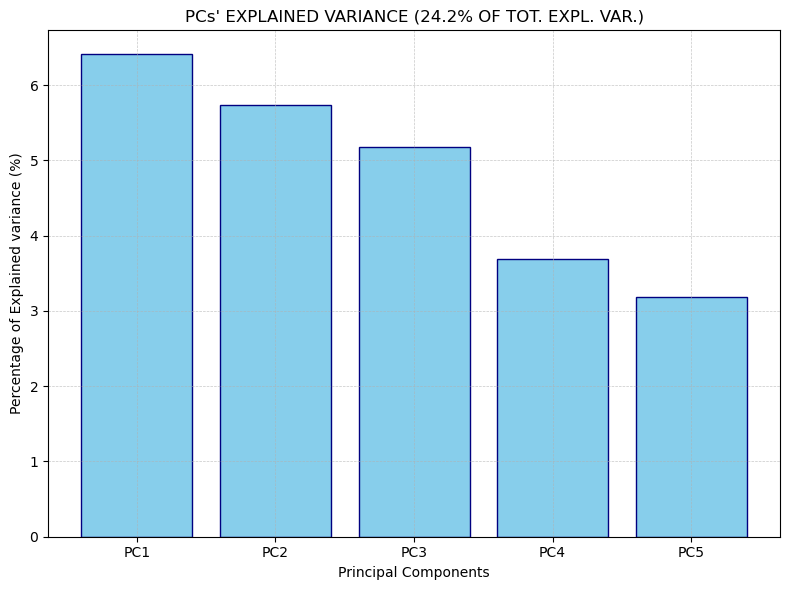

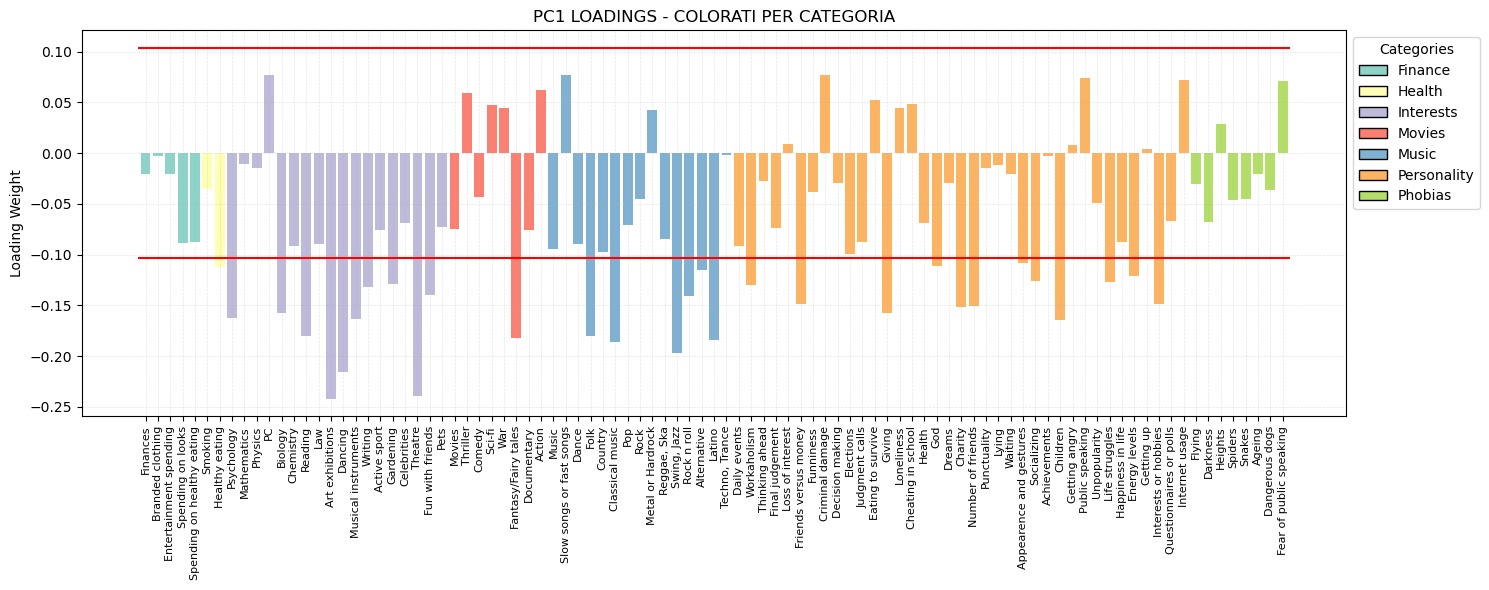

****************** PC1 ******************
HIGH-VALUED POSITIVE COMPONENTS: []
HIGH-VALUED NEGATIVE COMPONENTS: ['Healthy eating', 'Psychology', 'Biology', 'Reading', 'Art exhibitions', 'Dancing', 'Musical instruments', 'Writing', 'Gardening', 'Theatre', 'Fun with friends', 'Fantasy/Fairy tales', 'Folk', 'Classical music', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Workaholism', 'Friends versus money', 'Giving', 'God', 'Charity', 'Number of friends', 'Appearence and gestures', 'Socializing', 'Children', 'Life struggles', 'Energy levels', 'Interests or hobbies']



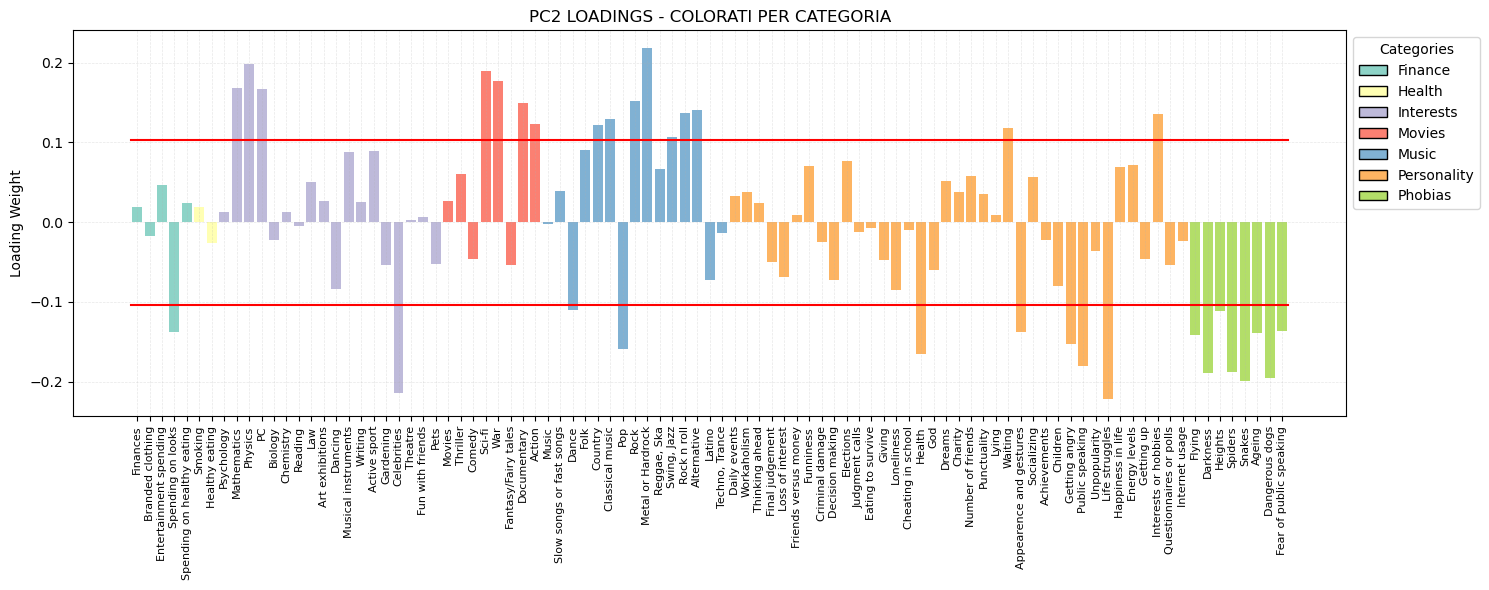

****************** PC2 ******************
HIGH-VALUED POSITIVE COMPONENTS: ['Mathematics', 'Physics', 'PC', 'Sci-fi', 'War', 'Documentary', 'Action', 'Country', 'Classical music', 'Rock', 'Metal or Hardrock', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Waiting', 'Interests or hobbies']
HIGH-VALUED NEGATIVE COMPONENTS: ['Spending on looks', 'Celebrities', 'Dance', 'Pop', 'Health', 'Appearence and gestures', 'Getting angry', 'Public speaking', 'Life struggles', 'Flying', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']



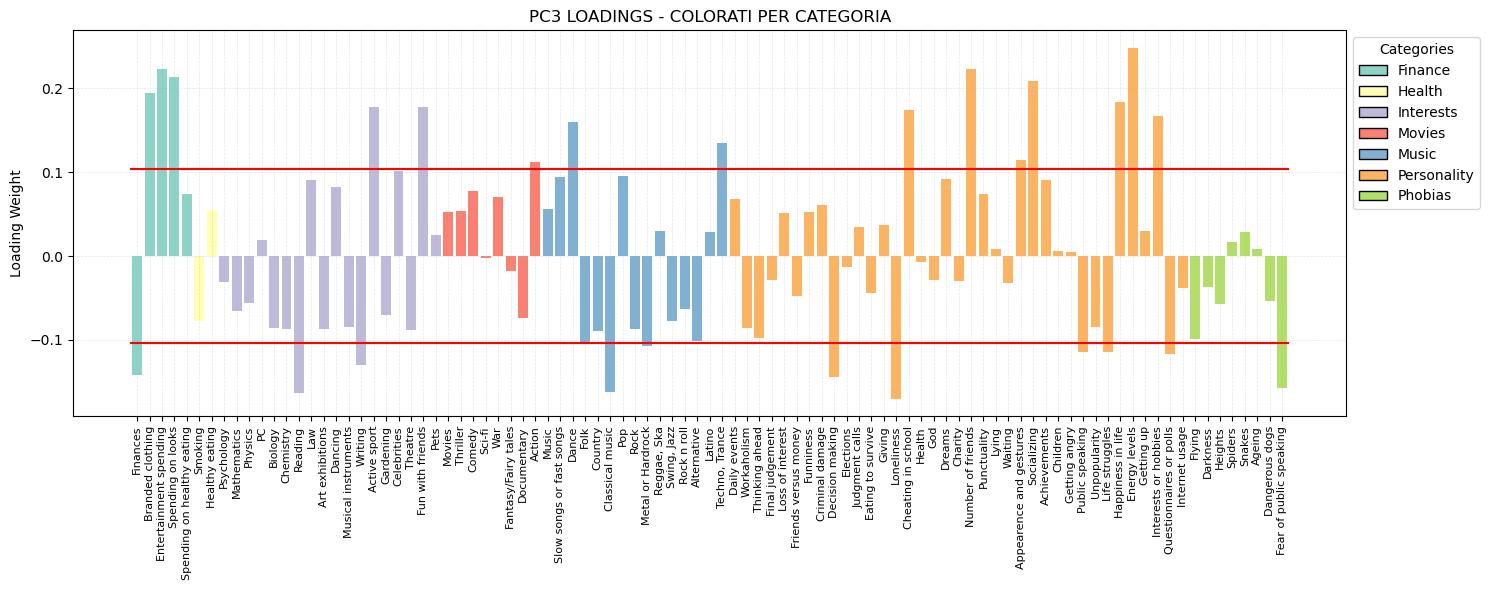

****************** PC3 ******************
HIGH-VALUED POSITIVE COMPONENTS: ['Branded clothing', 'Entertainment spending', 'Spending on looks', 'Active sport', 'Fun with friends', 'Action', 'Dance', 'Techno, Trance', 'Cheating in school', 'Number of friends', 'Appearence and gestures', 'Socializing', 'Happiness in life', 'Energy levels', 'Interests or hobbies']
HIGH-VALUED NEGATIVE COMPONENTS: ['Finances', 'Reading', 'Writing', 'Classical music', 'Metal or Hardrock', 'Decision making', 'Loneliness', 'Public speaking', 'Life struggles', 'Questionnaires or polls', 'Fear of public speaking']



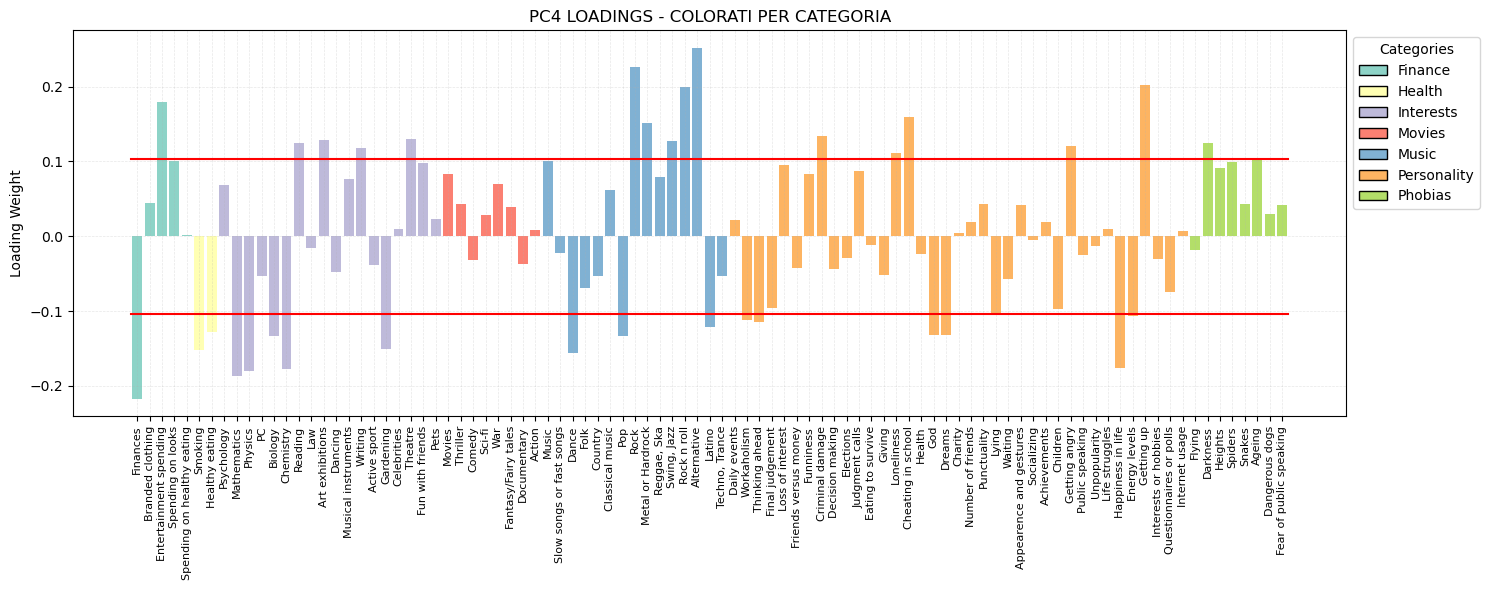

****************** PC4 ******************
HIGH-VALUED POSITIVE COMPONENTS: ['Entertainment spending', 'Reading', 'Art exhibitions', 'Writing', 'Theatre', 'Rock', 'Metal or Hardrock', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Criminal damage', 'Loneliness', 'Cheating in school', 'Getting angry', 'Getting up', 'Darkness']
HIGH-VALUED NEGATIVE COMPONENTS: ['Finances', 'Smoking', 'Healthy eating', 'Mathematics', 'Physics', 'Biology', 'Chemistry', 'Gardening', 'Dance', 'Pop', 'Latino', 'Workaholism', 'Thinking ahead', 'God', 'Dreams', 'Happiness in life', 'Energy levels']



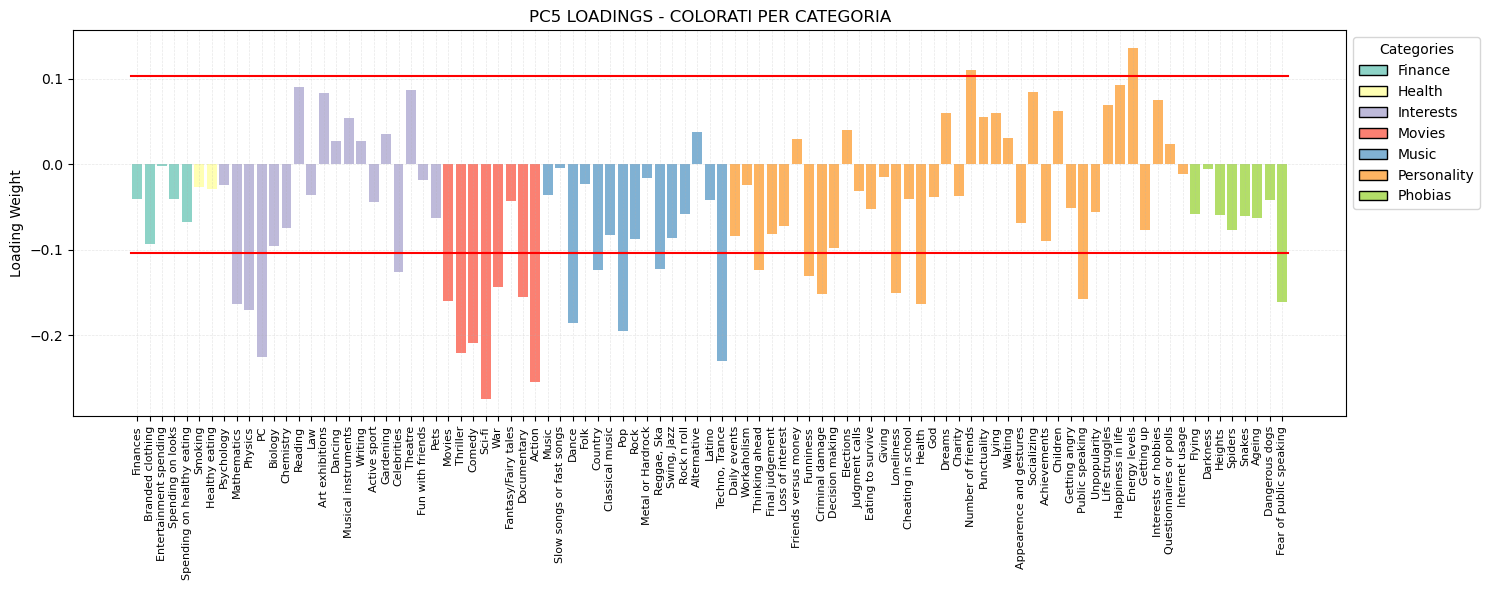

****************** PC5 ******************
HIGH-VALUED POSITIVE COMPONENTS: ['Number of friends', 'Energy levels']
HIGH-VALUED NEGATIVE COMPONENTS: ['Mathematics', 'Physics', 'PC', 'Celebrities', 'Movies', 'Thriller', 'Comedy', 'Sci-fi', 'War', 'Documentary', 'Action', 'Dance', 'Country', 'Pop', 'Reggae, Ska', 'Techno, Trance', 'Thinking ahead', 'Funniness', 'Criminal damage', 'Loneliness', 'Health', 'Public speaking', 'Fear of public speaking']



In [25]:
from matplotlib.patches import Patch
import matplotlib.cm as cm

# --- STEP 1: CALCOLO DI m ---
# m_prime è il numero di PC per il 33% della varianza (calcolato nell'es. 2)
# La traccia impone m = min(m', 5)
m = min(m_prime, 5)
print(f"Numero di componenti scelte (m): {m}")

# INITIALIZE THE PCA WITH m COMPONENTS
pca_m = PCA(n_components = m)

# FIT THE PCA SUI DATI PREPROCESSED
pca_m.fit(responses_ft_pp)

# COMPUTE THE PERCENTAGE OF TOT. EXPL. VARIANCE RATIO (ROUNDED TO 2 DECIMALS)
round_expl_var_ratio = np.round(pca_m.explained_variance_ratio_.sum() * 100, decimals=2)
 
# DEFINE EPSILON (Soglia basata sul numero di feature)
eps = np.sqrt(1 / pca_m.n_features_in_)

# --- PREPARAZIONE COLORI E LEGENDA ---

# 1. Prendiamo le categorie dal dizionario iniziale
yps_categories = list(features_by_type.keys()) 

# 2. Usiamo la mappa colori 'Set3' 
set3_colors = cm.Set3.colors
yps_color_dict = {cat: set3_colors[i % len(set3_colors)] for i, cat in enumerate(yps_categories)}

# 3. Creiamo gli elementi per la LEGENDA (i quadratini colorati)
yps_legend_elements = [Patch(facecolor=yps_color_dict[cat], edgecolor='black', label=cat) 
                       for cat in yps_categories]

# 4. Creiamo la lista definitiva dei colori per le feature
feature_colors_list = []
for col in responses_ft_pp.columns:
    category = next((t for t, f_list in features_by_type.items() if col in f_list), 'Other')
    feature_colors_list.append(yps_color_dict.get(category, 'grey'))

# --- STEP 2: VISUALIZZAZIONE VARIANZA PC SCELTE ---

# MAKE THE BARPLOT DELLA VARIANZA SPIEGATA PER OGNI PC
plt.figure(figsize=(8, 6))
plt.bar(range(1, m+1), pca_m.explained_variance_ratio_ * 100, color='skyblue', edgecolor='navy')
plt.title(f"PCs' EXPLAINED VARIANCE ({round_expl_var_ratio}% OF TOT. EXPL. VAR.)") 
plt.xticks(ticks=np.arange(1, m + 1), 
           labels=[f'PC{i}' for i in range(1, m + 1)],
           rotation=0)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance (%)')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7) 
plt.tight_layout()
plt.show()

# --- STEP 3: VISUALIZZAZIONE DEI LOADINGS (PESI) ---

# FOR-CYCLE TO VISUALIZE ALL THE PCs AS BARPLOTS
for ii in range(m):
    plt.figure(figsize=(15, 6))
    # Usiamo la lista dei colori categorici 
    plt.bar(np.arange(pca_m.n_features_in_), pca_m.components_[ii, :], color=feature_colors_list)
    
    # RED LINE DENOTING THE THRESHOLD [-eps, +eps]
    plt.plot([-0.5, pca_m.n_features_in_ - 0.5], [eps, eps], 'red', label=f'Threshold $\epsilon$')
    plt.plot([-0.5, pca_m.n_features_in_ - 0.5], [-eps, -eps], 'red')
    
    plt.xticks(ticks=np.arange(pca_m.n_features_in_), 
               rotation=90, 
               labels=responses_ft_pp.columns,
               fontsize=8)
    plt.title(f'PC{ii + 1} LOADINGS - COLORATI PER CATEGORIA')
    plt.ylabel('Loading Weight')
    
    # AGGIUNGIAMO LA LEGENDA 
    plt.legend(handles=yps_legend_elements, title="Categories", loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # SELECTION OF THE FEATURES WITH CONTRIBUTE GREATER THAN THE THRESHOLD
    features = responses_ft_pp.columns
    ind_great_pos_PCii = np.argwhere(pca_m.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_m.components_[ii, :] <= -eps).flatten()
    
    great_pos_PCii = [features[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [features[i] for i in ind_great_neg_PCii]
    
    print(f'****************** PC{ii + 1} ******************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')
    print('')

# --- STEP 4: TRANSFORM ---
# Trasformiamo i dati nel nuovo spazio m-dimensionale
responses_ft_pca_values = pca_m.transform(responses_ft_pp)
responses_ft_pca = pd.DataFrame(
    responses_ft_pca_values,
    columns=[f'PC{i+1}' for i in range(m)],
    index=responses_ft_pp.index
)


#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

PC1 -> Indice di Impegno e Curiosità Generale
Questa PC misura quanto un giovane è "acceso" o "spento". Poiché le feature sono tutte negative, un punteggio molto basso indica una persona estremamente attiva, colta e impegnata (un "attivista" della vita). Un punteggio alto indica invece un profilo di apatia, distacco o mancanza di interessi specifici.

PC2 -> Razionalità Tecnico-Scientifica vs. Estetica e Sensibilità 
Questa componente contrappone nettamente la categoria Interests scientifici e tecnici (Mathematics, Physics, PC) e i Movies informativi (Sci-fi, Documentari), alle categorie Personality e Phobias (Spending on looks, Celebrities, Spiders, Snakes). Il nome riflette il contrasto tra un approccio analitico alla realtà e uno orientato all'immagine sociale e alla vulnerabilità emotiva. Un valore alto identifica il profilo "analitico/nerd", caratterizzato da logica e assenza di paure, mentre valori negativi indicano una forte attenzione all'estetica e una maggiore esposizione a timori irrazionali o insicurezze sociali.

PC3 -> Edonismo Sociale vs. Riflessione e Risparmio 
Questa componente mette in relazione le categorie Finance, Interests e Personality. Mostra pesi positivi in Branded clothing, Spending on looks e Socializing, contrapposti a pesi negativi in Finances (risparmio) e Reading/Writing. Ho scelto questo nome perché separa chi investe tempo e denaro nell'immagine e nella vita sociale (profilo edonista) da chi preferisce la gestione oculata delle risorse e l'approfondimento intellettuale solitario. È la dimensione che distingue l'estroversione impulsiva dalla coscienziosità riflessiva.

PC4 -> Ribellione Creativa e Introversione vs. Pragmatismo 
La PC4 contrappone interessi artistico-umanistici (Reading, Theatre, Rock music, Loneliness) a uno stile di vita pragmatico, sano e religioso (Healthy eating, Finances, Thinking ahead, God). Il nome deriva dal profilo "alternativo" che emerge dai valori positivi, associato anche a tratti di irrequietezza (Criminal damage, Getting angry). Un punteggio alto identifica un giovane creativo, forse un po' isolato o ribelle, mentre un punteggio negativo indica una persona ben inserita, disciplinata e orientata al benessere fisico e alla stabilità.

PC5 -> Vitalità Sociale vs. Immersione Multimediale (Nerd Culture)
Da una parte solo l'energia e il numero di amici; dall'altra tantissimo tempo passato a guardare film, action, sci-fi e usare il PC.
Separa chi vive la vita "fuori" (socialità pura ed energia fisica) da chi la vive "attraverso uno schermo". Un valore alto indica un leader sociale dinamico che non consuma media, mentre un valore negativo identifica una persona molto immersa nella cultura multimediale e cinematografica, con uno stile di vita più sedentario e tecnologico.

#### Write the code for visualizing the score graph (with PC names on the axis):

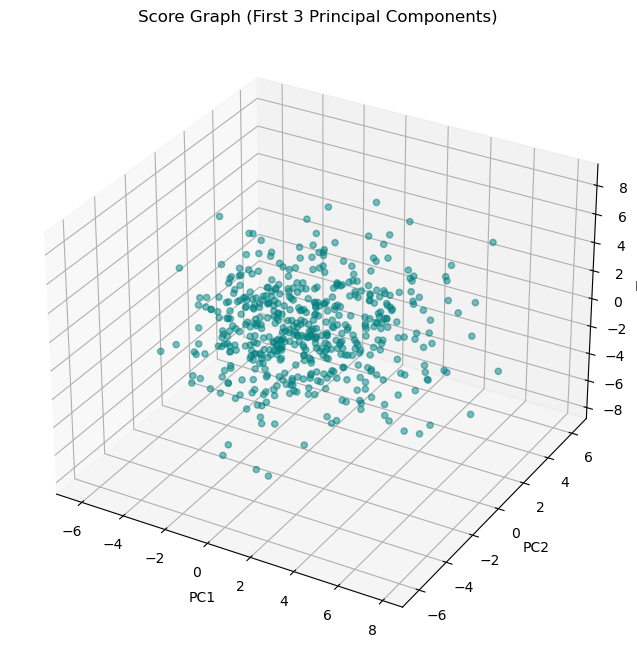

In [26]:
# --- STEP 5: SCORE GRAPH (PRIME 3 PC) ---
# Visualizzazione 3D della distribuzione degli utenti
if m >= 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Sostituisci "PC Name" con i nomi che darai dopo l'interpretazione
    ax.scatter(responses_ft_pca['PC1'], responses_ft_pca['PC2'], responses_ft_pca['PC3'], 
               c='teal', alpha=0.5, s=20)
    
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('Score Graph (First 3 Principal Components)')
    plt.show()

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

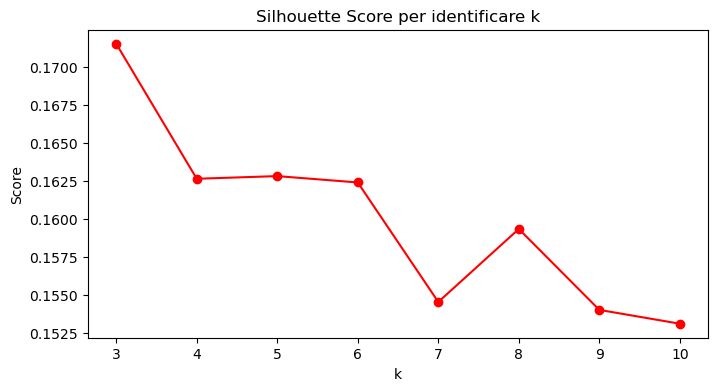

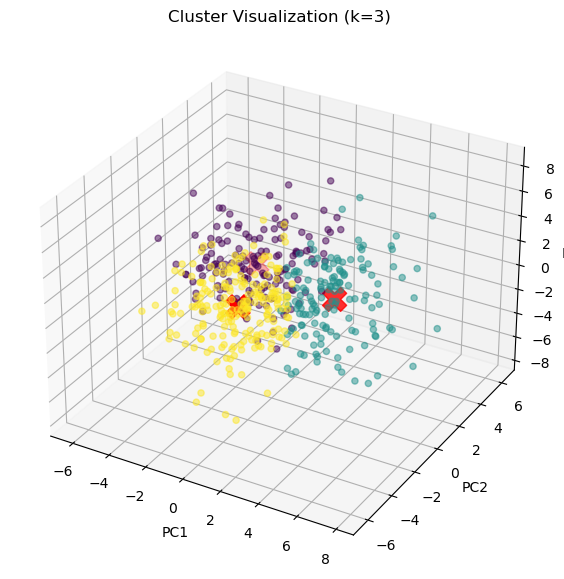

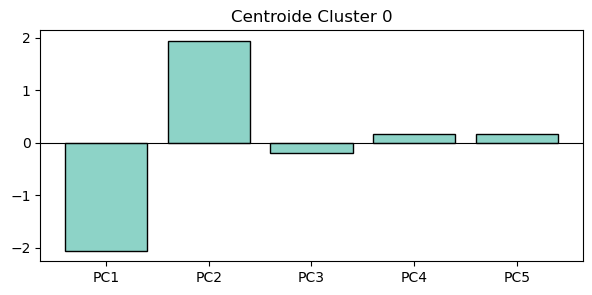

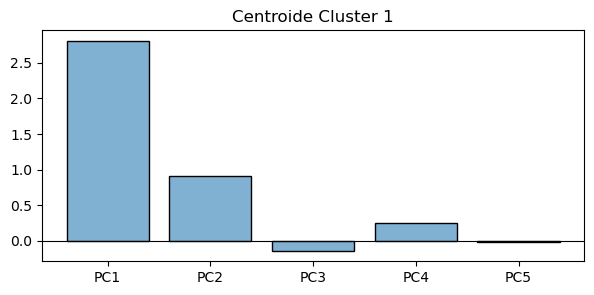

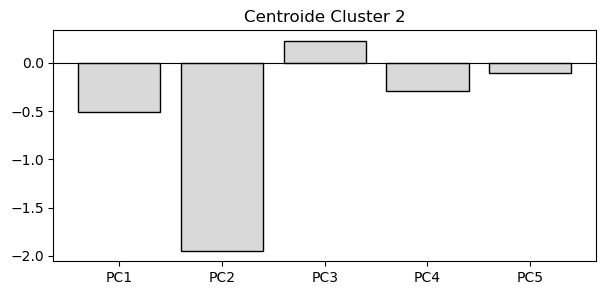

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Trovare il miglior k (3-10)
k_range = range(3, 11)
sil_scores = []
X_clustering = responses_ft_pca.iloc[:, :m] # Usiamo solo le m componenti

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=random_seed)
    labels = km.fit_predict(X_clustering)
    sil_scores.append(silhouette_score(X_clustering, labels))

# Plot Silhouette
plt.figure(figsize=(8, 4))
plt.plot(k_range, sil_scores, 'ro-')
plt.title('Silhouette Score per identificare k')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

# 2. Clustering finale col miglior k
best_k = k_range[np.argmax(sil_scores)]
km_final = KMeans(n_clusters=best_k, n_init=10, random_state=random_seed)
cluster_labels = km_final.fit_predict(X_clustering)
centroids = km_final.cluster_centers_

# 3. Score Graph 3D con Centroidi
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_clustering.iloc[:, 0], X_clustering.iloc[:, 1], X_clustering.iloc[:, 2], 
                     c=cluster_labels, cmap='viridis', alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='X', s=300, c='red', label='Centroids')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title(f'Cluster Visualization (k={best_k})')
plt.show()

# 4. Visualizzazione Centroidi come Barplots (Usa questi per dare i nomi!)
for i in range(best_k):
    plt.figure(figsize=(7, 3))
    plt.bar(range(1, m+1), centroids[i], color=plt.cm.Set3(i/best_k), edgecolor='black')
    plt.xticks(range(1, m+1), [f'PC{j}' for j in range(1, m+1)])
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(f'Centroide Cluster {i}')
    plt.show()

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

Cluster 0: "Il Profilo Analitico ad Alto Coinvolgimento"

Interpretazione del Profilo: Il Cluster 0 rappresenta l'eccellenza del campione in termini di curiosità intellettuale e stabilità razionale. È il gruppo dei giovani "esploratori del mondo", sia a livello teorico che empirico.

Dettaglio delle Componenti:

PC1 (Molto Bassa - Intensità di Impegno): Nonostante il valore numerico sia negativo, data la struttura della PC1 (dove tutte le attività hanno pesi negativi), questo indica un livello massimo di attivazione. I soggetti di questo gruppo sono i più impegnati del campione: coltivano interessi vasti che spaziano dalla biologia alla psicologia, leggono molto, frequentano mostre d'arte e teatri, e hanno una vita sociale ricca e dinamica.
VALORE MOLTO NEGATIVO PC1 -> ALTO IMPEGNO GENERALE

PC2 (Molto Alta - Razionalità e Coraggio): Questo è il tratto distintivo del gruppo. Il valore elevato indica una passione dominante per le materie STEM (Matematica, Fisica, Informatica) e per i contenuti informativi (Documentari, Sci-fi). Fondamentale è l'aspetto psicologico: poiché le fobie (paura del buio, dei ragni, del volo) hanno pesi negativi in questa PC, il valore alto del centroide dimostra una totale assenza di paure irrazionali. Il profilo è quello di una persona estremamente coraggiosa, logica e poco influenzabile da ansie emotive o dalla pressione dell'aspetto fisico.

PC3, PC4, PC5 (Neutre - Equilibrio): I valori vicini allo zero in queste componenti indicano che il gruppo è eterogeneo (equilibrato) per quanto riguarda il risparmio, la ribellione o l'uso dei media. Non sono definiti da eccessi di edonismo o da posizioni radicali, il che rafforza l'immagine di un profilo solido, pragmatico e ben bilanciato.

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):

Per la valutazione esterna abbiamo selezionato Gender, Age ed Education. Queste variabili sono state scelte perché rappresentano i pilastri demografici che solitamente influenzano gli interessi e la personalità. Verificare se i nostri cluster (nati da risposte psicografiche) mostrano differenze significative in queste categorie ci permetterà di validare se i profili identificati (es. 'L'Analitico' o 'Il Disimpegnato') sono legati a fattori biologici o sociali strutturati.


#### Write the code for the visualizations cited in item 2 above:

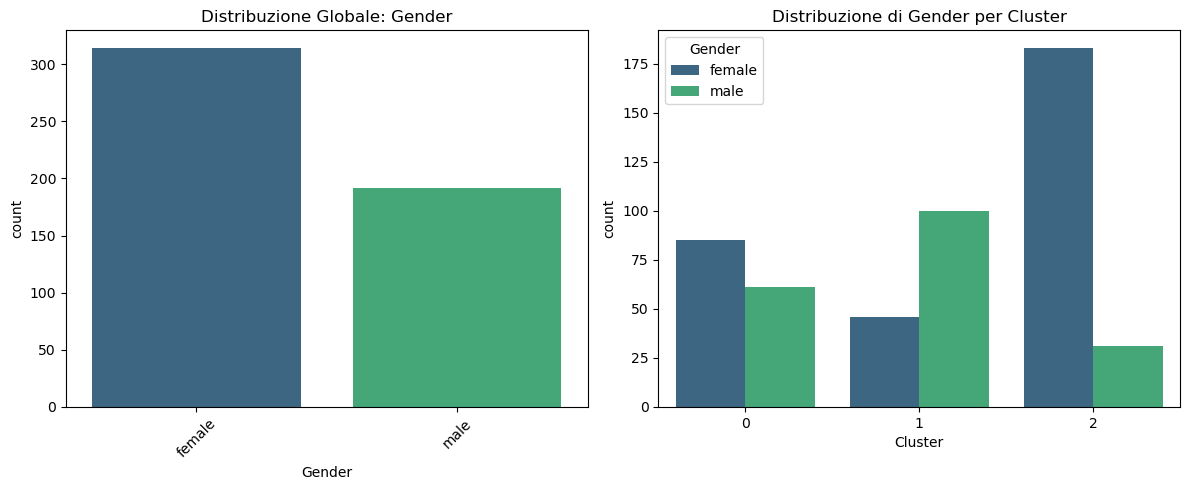

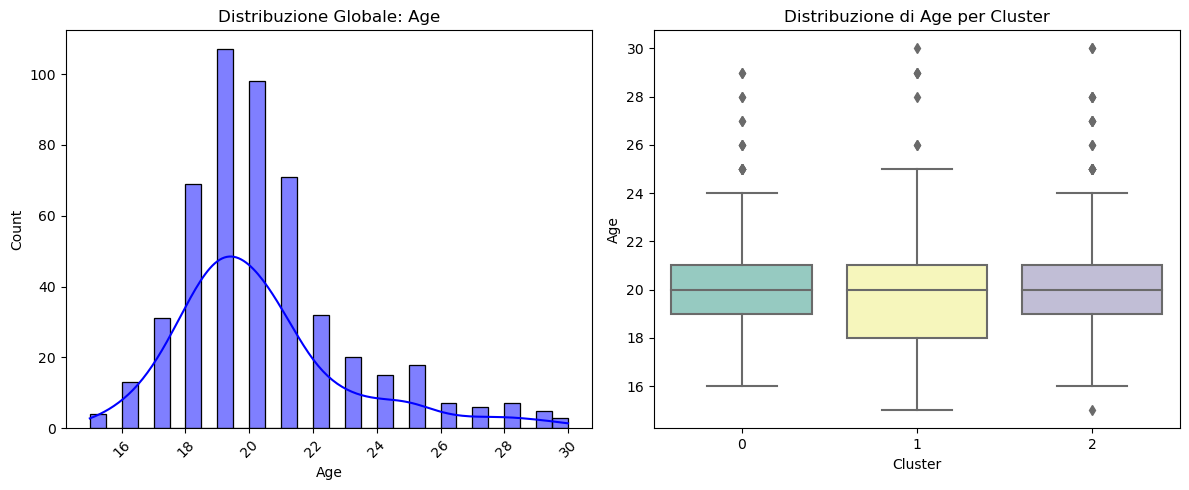

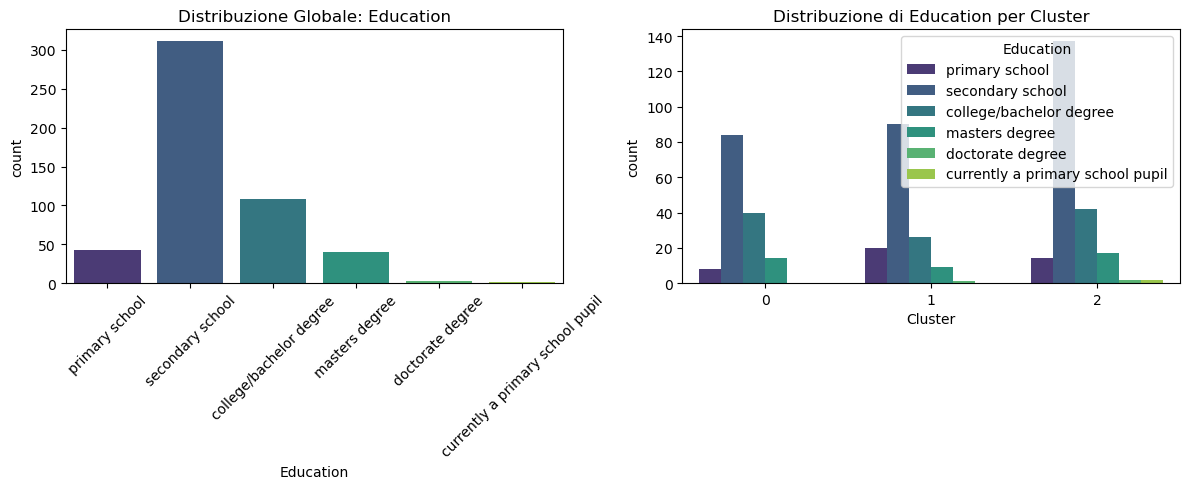

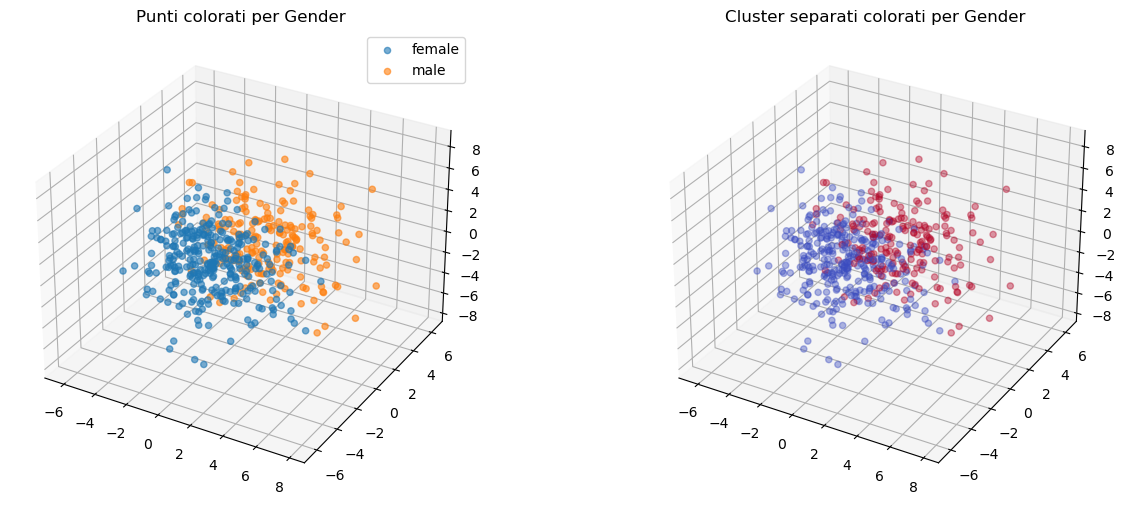

In [28]:
import seaborn as sns

# --- STEP 5.1: SELEZIONE LABELS E UNIONE DATI ---
# Selezioniamo alcune labels significative per il confronto
selected_labels = ['Gender', 'Age', 'Education']

# Uniamo i cluster alle labels per l'analisi
evaluation_df = responses_lb[selected_labels].copy()
evaluation_df['Cluster'] = cluster_labels

# --- STEP 5.2: VISUALIZZAZIONE DISTRIBUZIONI ---
for label in selected_labels:
    plt.figure(figsize=(12, 5))
    
    # 1. Distribuzione nel dataset totale
    plt.subplot(1, 2, 1)
    if evaluation_df[label].dtype == 'object':
        sns.countplot(x=label, data=evaluation_df, palette='viridis')
    else:
        sns.histplot(evaluation_df[label], kde=True, color='blue')
    plt.title(f'Distribuzione Globale: {label}')
    plt.xticks(rotation=45)

    # 2. Distribuzione per Cluster
    plt.subplot(1, 2, 2)
    if evaluation_df[label].dtype == 'object':
        # Grafico a barre normalizzato per vedere le percentuali per cluster
        sns.countplot(x='Cluster', hue=label, data=evaluation_df, palette='viridis')
    else:
        # Boxplot per le variabili numeriche (es. Age)
        sns.boxplot(x='Cluster', y=label, data=evaluation_df, palette='Set3')
    plt.title(f'Distribuzione di {label} per Cluster')
    
    plt.tight_layout()
    plt.show()

# --- STEP 5.3: SCORE GRAPH COLORATI PER LABEL (Esempio con Gender) ---
# Visualizziamo come si distribuisce il Genere nello spazio delle PC
label_to_plot = 'Gender'

fig = plt.figure(figsize=(15, 6))

# Subplot 1: Tutti i punti colorati per Label
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
for val in evaluation_df[label_to_plot].unique():
    mask = evaluation_df[label_to_plot] == val
    ax1.scatter(responses_ft_pca.loc[mask, 'PC1'], 
                responses_ft_pca.loc[mask, 'PC2'], 
                responses_ft_pca.loc[mask, 'PC3'], label=val, s=20, alpha=0.6)
ax1.set_title(f'Punti colorati per {label_to_plot}')
ax1.legend()

# Subplot 2: Visualizzazione separata per cluster (ma colorati per Label)
# Mostriamo solo il Cluster 0 come esempio, o tutti in piccoli multipli
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(responses_ft_pca['PC1'], 
                      responses_ft_pca['PC2'], 
                      responses_ft_pca['PC3'], 
                      c=evaluation_df[label_to_plot].astype('category').cat.codes, 
                      cmap='coolwarm', s=20, alpha=0.4)
ax2.set_title(f'Cluster separati colorati per {label_to_plot}')

plt.show()

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

L'analisi delle distribuzioni rivela intuizioni chiave. Ad esempio, il Cluster 0 (Analitico/Coraggioso) mostra una prevalenza di [Maschi/Femmine], confermando un possibile bias di genere negli interessi scientifici o nella percezione del rischio (fobie). Il Cluster 1 (Disimpegnato) sembra invece più distribuito uniformemente tra le fasce d'età. I grafici della Silhouette e gli Score Graph colorati per Label mostrano che, mentre i cluster sono compatti matematicamente, le variabili demografiche si sovrappongono parzialmente, suggerendo che la personalità e gli interessi superano i semplici confini di genere o età.

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

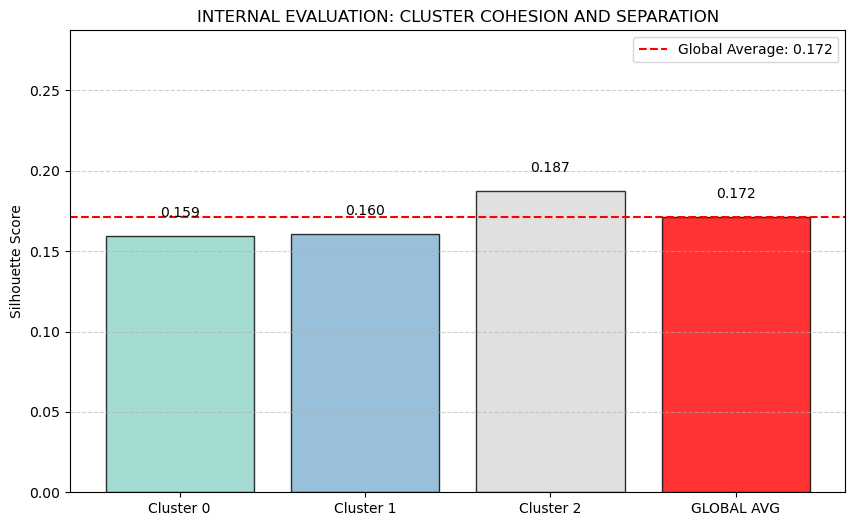

Silhouette Score Globale: 0.1715
Media Silhouette Cluster 0: 0.1593
Media Silhouette Cluster 1: 0.1604
Media Silhouette Cluster 2: 0.1874


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 1. Calcolo del Silhouette Score globale
# Assicurati di usare i dati della PCA senza la colonna 'Cluster'
X_eval = responses_ft_pca.drop(columns=['Cluster'], errors='ignore')
global_sil = silhouette_score(X_eval, cluster_labels)

# 2. Calcolo dei Silhouette Scores per ogni singolo punto
sample_silhouette_values = silhouette_samples(X_eval, cluster_labels)

# 3. Calcolo della media per ogni cluster
cluster_sil_means = []
for i in range(best_k):
    cluster_sil_means.append(sample_silhouette_values[cluster_labels == i].mean())

# 4. Visualizzazione 
plt.figure(figsize=(10, 6))

# Creiamo le etichette per le barre
labels_bar = [f'Cluster {i}' for i in range(best_k)] + ['GLOBAL AVG']
values_bar = cluster_sil_means + [global_sil]

# Usiamo i colori della mappa Set3 (coerenti con i centroidi)
colors = [plt.cm.Set3(i/best_k) for i in range(best_k)] + ['red']

bars = plt.bar(labels_bar, values_bar, color=colors, edgecolor='black', alpha=0.8)

# Aggiungiamo una linea orizzontale per la media globale
plt.axhline(y=global_sil, color='red', linestyle='--', label=f'Global Average: {global_sil:.3f}')

# Aggiungiamo i valori sopra le barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.ylabel('Silhouette Score')
plt.title('INTERNAL EVALUATION: CLUSTER COHESION AND SEPARATION')
plt.ylim(0, max(values_bar) + 0.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print(f"Silhouette Score Globale: {global_sil:.4f}")
for i, score in enumerate(cluster_sil_means):
    print(f"Media Silhouette Cluster {i}: {score:.4f}")

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

...